## Fundamentals of Social Data Science: Week 1, Day 1
# Distributions

We begin our lessons on social data science with an interest in the 'distribution'. Distributions are both mathematical concepts and empirical ones. 

- **Empirical distributions**: Collections of measurements. 
- **Mathematical distributions**: Formulae for calculating a particular value given some other value. 

All distributions have a shape. For empirical distributions that shape is often very uneven and only approximated by a mathematical formula. 

When we work with empirical distributions, we are normally working with a collection in a data set. But what we want to claim about the distributions will require us to understand its relationship to these more abstract mathematical distributions. 

While this is a course in _social_ data science, we will start with some basic distributions and some toy data. One classic data set for looking at relationships in data is the Iris data, collected by Edgar Anderson and used by renowned statistician R. A. Fisher in a seminal paper on classification. This is a set of measurements of different flowers in the same family. We use this partially because it is a well behaved data set and partially because it is available easily, allowing us to get up and running quickly. 

To follow this tutorial, you will need some external Python packages. This includes `sklearn` and `scipy`. First check to see if these are installed: 

> Note that in this version of the walkthrough I will create a 'virtual environment' using Visual Studio. In order to do this yourself, you will need to have the requirements.txt file in the root directory of the folder you are working in. I will be creating a virtual environment for _this week_ and so we will be opening that folder. 

> Note that within the folder containing this file should be a folder called "data". In that folder, place the `movies.feather` file. 

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import sklearn 

print(pd.__version__)

from sklearn.datasets import load_iris
iris = load_iris()

print("The iris data is of the following type: ", type(iris))


2.2.3
The iris data is of the following type:  <class 'sklearn.utils._bunch.Bunch'>


If this code ran without problems it will report the version of seaborn. In this case, I am using version `0.13.2` but your version might differ slightly. It will also If you do not have it installed, then run the line `pip install ...`  (uncomment it). It should install the package in the version of Python that you are using in this notebook.

The iris data should similarly load without problems in which case it will say that the type is a `<class 'sklearn.utils._bunch.Bunch'>`. But this is not a useful type for us. Instead, we will want to transform it into a DataFrame. The DataFrame is one of two common ways to store tabular data in Python, the other is in numpy arrays. numpy is more useful when we start doing calculations on the data set, whereas DataFrames are more useful when we have data with many kinds of objects, such as numbers, dates, text, and even images or other Python objects. 

We will discuss DataFrames at greater length in the next lecture. For now, the important aspect of a DataFrame is that it is a table, meaning that it has rows and columns. Each column is a distribution, and the rows represent individual measurements.  

In [9]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print("The columns in the Iris data:\n", "\n".join(iris_df.columns), sep="")

The columns in the Iris data:
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


First we will turn the iris data into a DataFrame. Then we can look at a single distribution within the data. 

In [10]:
display(iris_df)
# print(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Notice that Python truncates the data, so displaying the data will not necessarily reveal all of the measurements. But indeed we can see there are 4 columns each with some numbers in there. You can also force Python to display more of the table, but ultimately this is not the best way to browse the data. 

In Visual Studio there are indeed ways to view this data more effectively. 

Let's try the following steps: 
1. Click the "Variables" button in the upper right corner. If your screen is small it might be under an ellisis just to the left of where it notes the Kernel (in my case it is an icon of a tower followed by `base (Python 3.12.2)`). 
2. Look in the table of variables for `iris_df`. Notice the little call-out icon on the left hand side. Click it. 
3. This might ask you to install an extension for VS called the "Microsoft Data Wrangler". Agree to install it. Then return and click again. You should see a view that will now have distributions for all of the four variables. 

In the data wrangling view, have a look at the four columns. At the top of the table should be a visual representation of the data as a histogram of values, followed by a summary of the values, and then followed by the rows of the data set. 

Which of the four distributions looks the most like a normal distribution? Recall that a normal distribution is one that has a mid-point which should have the most common values and that as we get away from the mid-point the values get decreasingly likely. For this reason, some refer to the normal distribution as a 'bell curve'. 


Indeed, `sepal_width` appears to have the distribution that looks the most like a normal distributon. However, in addition to a visual inspection of this, we can also use a series of statistical tests to explore how much this distribution resembles a normal distribution. In particular, we can use 'skewness' and 'kurtosis' as a measures of normality as well as a Shapiro-Wilks test of normality which measures deviation from an ideal normal curve. Let's look at each of these in turn. 

We will compare each of the variables to these concepts one after the other: 

In [11]:

numeric_columns = iris_df.select_dtypes(include=[np.number]).columns
print("\n".join(numeric_columns))

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


In [12]:
# Skewness: To what extent does the variable skew left (negative) or right (positive)?

skewness = iris_df[numeric_columns].skew()

print("Skewness:\n", skewness, sep="")

Skewness:
sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64


It appears that the data all have some slight skew. The sepals are slightly right-skewed and petals are slightly left-skewed. Now Kurtosis asks about how spiky the peaks are in the data. Go back and have a look at the distributions and guess which ones are the most spiky (i.e. have the highest peak relative to their spread).

In [13]:
kurtosis = iris_df[numeric_columns].kurtosis()

print("\nKurtosis:\n", kurtosis, sep="")


Kurtosis:
sepal length (cm)   -0.552064
sepal width (cm)     0.228249
petal length (cm)   -1.402103
petal width (cm)    -1.340604
dtype: float64


So the sepal width as a slight spikiness whereas the others are generally more flat than a normal curve. Now skewness and kurtosis do not give us the sort of statistical estimation that would be useful. Instead, we can use a Shapiro-Wilks test to ask how 'significantly different' the data is from a normal distribution. This involves both reporting a score on the test and a p-value. 

P-values are highly useful in measuring things in data science, though they are not the only means to establish a relationship. One effective way to talk about them is instead of saying 'significant' we say 'significantly different' instead. So in this case, if the result is below 0.05 it means that there is less than 1 in 20 chance that the true distribution is actually normal given the data that we have observed. 

If you have encountered p-values before this one might be counter intuitive since we are _not_ looking for significance. If it is significant that means it's _significantly different from normality_. 

So think about that for a minute before looking to the results. Look at the distributions and think "will this be below 0.05 or above it?" 

In [14]:
# Perform Shapiro-Wilk test for normality
shapiro_results = {}
for column in numeric_columns:
    stat, p = stats.shapiro(iris_df[column])
    shapiro_results[column] = {'statistic': stat, 'p-value': p}

print("\nShapiro-Wilk Test Results:")
for column, result in shapiro_results.items():
    print(f"{column}: statistic={result['statistic']:.4f}, p-value={result['p-value']:.4f}")


Shapiro-Wilk Test Results:
sepal length (cm): statistic=0.9761, p-value=0.0102
sepal width (cm): statistic=0.9849, p-value=0.1012
petal length (cm): statistic=0.8763, p-value=0.0000
petal width (cm): statistic=0.9018, p-value=0.0000


Finally, the last way to explore this data is visually, which will allow us to see whether the deviation from normality is more prevalent near the middle of the distribution or more prevalent near the tails. For this we can use a "Q-Q" plot. This will also allow us to explore how Python does plotting.

To plot in Python we typically use the `matplotlib` package or some derivation of that package such as `seaborn`. To make a plot we first make a plot 'object'. Then we layer things on to that plot object. This also means that the things you layer on later will appear on top of the things you layer earlier, so be mindful of the order in which you build your plot. 

At the end of creating the plot, you would want to either show the plot in the frame (as we will do here) or save the plot as a figure. 

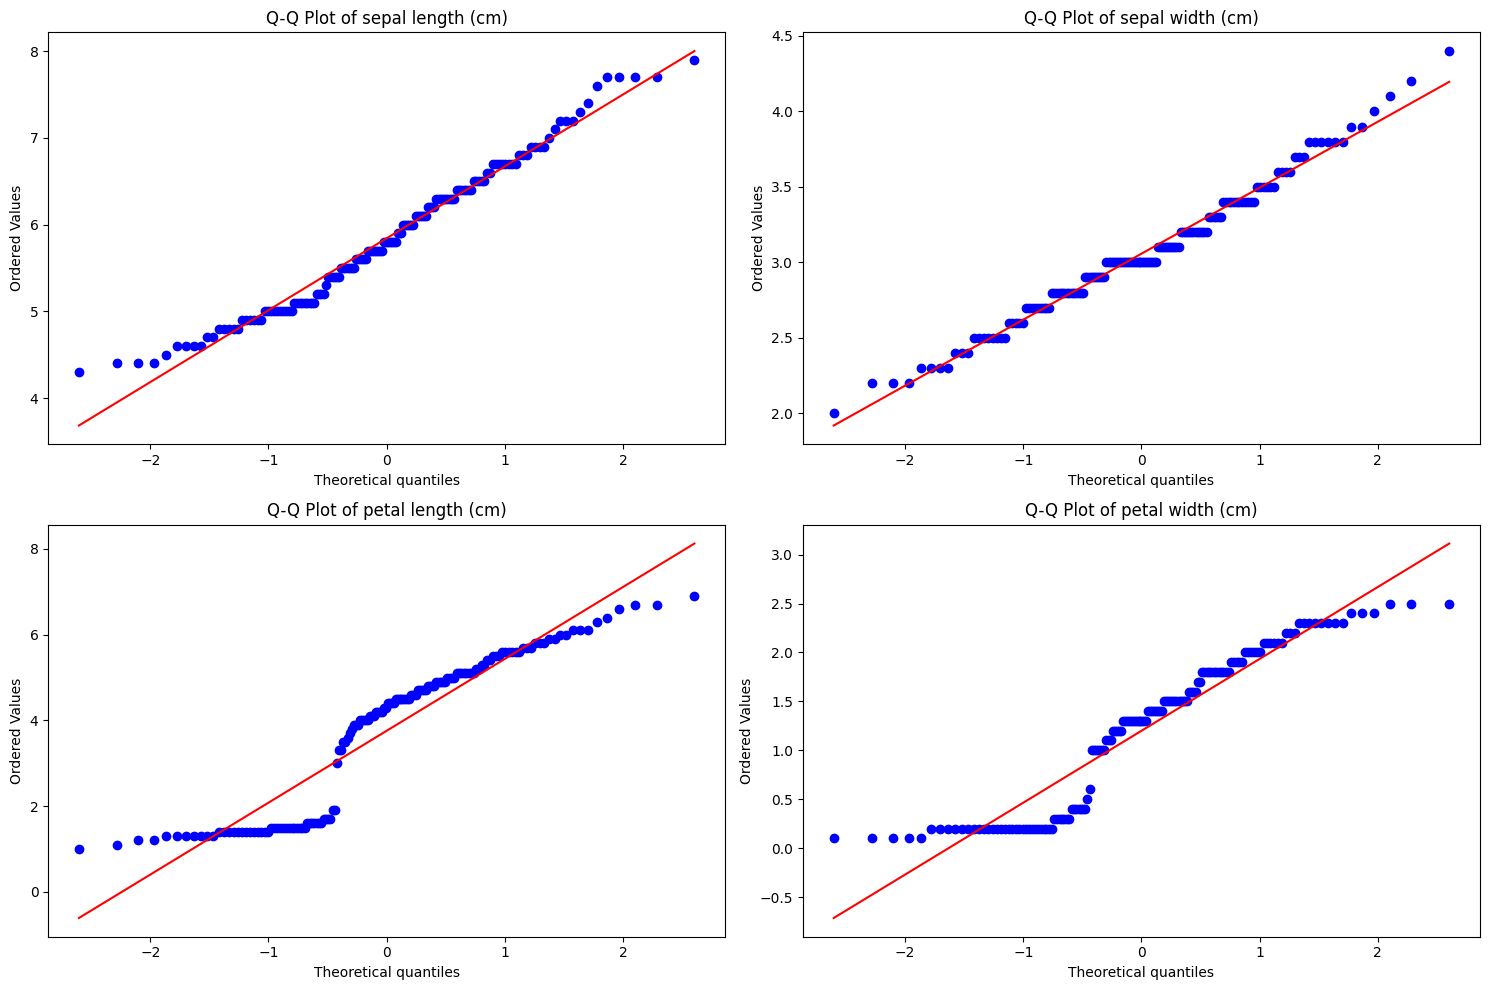

In [15]:
import matplotlib.pyplot as plt

# Create Q-Q plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    stats.probplot(iris_df[column], dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot of {column}")

plt.tight_layout()
plt.show()

So these plots help us learn where the distribution is different from normality. It is clear that sepal width is the most normal as it is the closest to the line. Sepal length is also pretty close to normal, but it deviates a little on the left hand side meaning that the smallest petals are not as short as we would expect given a normal distribution. The two plots for petals also show what might be a pretty strange pattern that is reflected in the histograms we saw in the data wrangler.

# Faceting data

A facet is a originally described as a side of a jewel. So a dimond might have many facet making it look like a jewel and making light shine through it at interesting angles. When we facet data we are similarly trying to look at it from different angles. Often, we will facet data by looking at subgroups within the data set. In this case, the data is not simply four different measurements of flowers, but of three different kinds of flowers that all are in the same family.  

When we look at each of the flowers individually, we might discover that our initial exploration of the data was a bit misguided. 

Below we will create some subgroups in the data. In this case, since the data comes from sklearn and so the commands below are a bit niche. At this point we know that we had imported some sample data and created a DataFrame with them. But this data is partially interesting because of the behaviour of the statistics when we look at the subgroups within it. So where are the labels for the flowers? To investigate this we can look at the original `iris` object, for example with `dir(iris)`. Explore iris.data or iris.target and see what we have. 

In [16]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

We discover that there is a column `iris.target_names` with flower names. It's the same length as the data, and so we are inclined (rightly) to believe that we can use this as an additional column in the data. In this case, I will create a new column with 'Categorical' data. You can treat this column as string data, but Categorical is a nice way to draw on the assumptions that this data will be used to categorise. String data can also be useful for names, comments, and any body text which are not directly meant for subgrouping. 


In [17]:
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


This time I will group the various tests we did in a function. Then we will check on these normality assumptions per-species. The function returns the data as a dictionary, which we can either print directly or use to build a table and report on all the results. As we are just learning DataFrames, I will use this opportunity to show how to filter a DataFrame and then query the function with the filtered data. To filter a DataFrame, in depends on whether we are filtering columns or rows. 

To filter a Series or a DataFrame down to some category, we would first create a new Series with a Boolean value. Then we ask for only the rows where the new Series has the value `True`. So if one of the flowers is "Setosa" then `df['Species] == "Setosa"` will produce a column with just the rows for the "Setosa". We then return to the original DataFrame with this new series and use an `indexer`, (i.e. the `[]`). We can do this in one line as iris_df[df['Species] == "Setosa"]. However, that's 'hardcoding' the name "Setosa". Instead we want to have a variable so we can iterate through all of them.  

For this, I will explore this data using the Data Wrangler. There we can filter using the options and the dialog. We will select a flower type, make the data equal to that and update the viewer. We can then see if the histograms update accordingly. Do they still have a similar shape? 

If we wanted to alter the data we can select edit and then do the following: 

`iris_df = iris_df[iris_df["species"]=="versicolor"]` and see how the histograms update. 

Note that this makes a change to the data. If you say `iris_df = ...` then it will rewrite the DataFrame in the code.  Thus, you would not normally use the wrangler for such changes that you want to make permanent. You instead should use it to preview data operations. 

# Other distributions and what about a more general function? 

We will not find data online that always approximates a normal distribution. In fact, we are likely to see all different kinds of distributions. In a more general way than with the above tests, we can use a Kolmogorov-Smirnov test statistic and set the distribution. 

In [18]:
# I did this here to remind myself the proper column names
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [19]:
results = stats.kstest(iris_df['sepal length (cm)'], 'norm')
print(results)

KstestResult(statistic=np.float64(0.999991460094529), pvalue=np.float64(0.0), statistic_location=np.float64(4.3), statistic_sign=np.int8(-1))


In [20]:

print("Results of the Kolmogorov-Smirnov test:\n", 
      f"Score: {results.statistic:0.3f}",
      f"P-value: {results.pvalue:0.3f}")

Results of the Kolmogorov-Smirnov test:
 Score: 1.000 P-value: 0.000


# Transforming distributions 

In addition to testing the distribution in its current state, we can also transform a distsribution, either when analysing data or when plotting it. For this we might use a mathematical function. Often when data is highly skewed, transforming it using a different scale can make patterns visible. This is especailly the case for distributions which are 'scale-free' or approximate scale-free distributions. While these may seem obscure, they are relatively common online. For example, the number of links into and out of a website approximate a scale-free distribution. These flowers, constrained by their physical growth wouldn't exhibit a lot of scale-free distributions when measuring their size, so they might not be the best place to look for such distributions by example. 

Below I will create a distribution that is scale-free, based on a mathematical function. This will be a random draw from a function and so the distribution will be relatively clean. It will also be very steep. However, when we look at it on a log scale (i.e. where each unit represents an increase in _order of magnitude_) it should look roughly like a straight line. Imagine that this represents the distribution of followers on X, or links into a website. Do you have an intuitive sense of why it would look like a straight line when log transformed?  

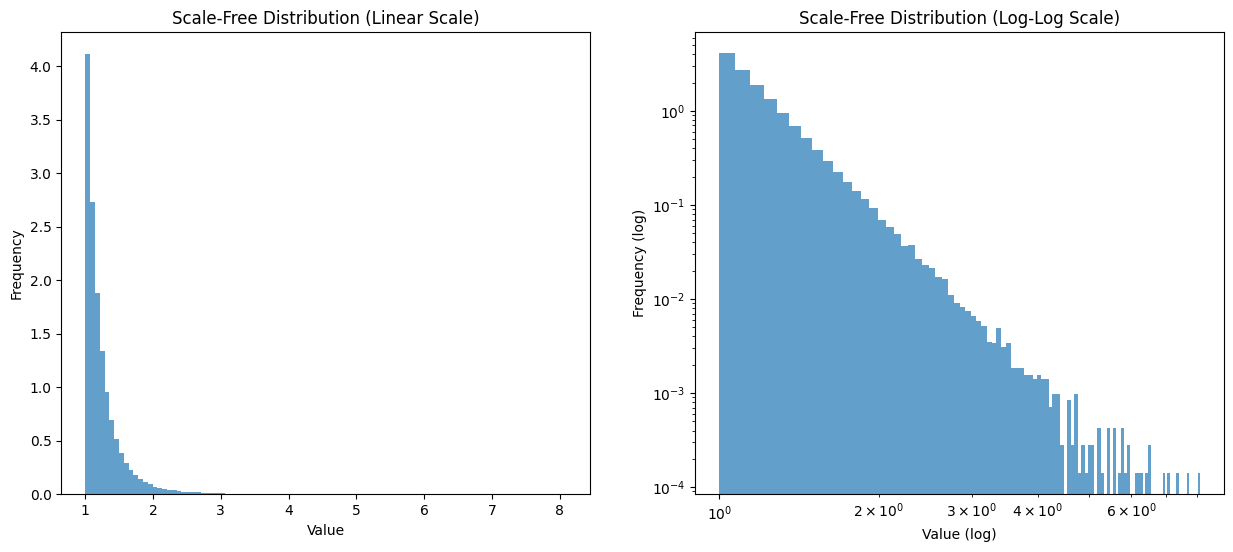

In [22]:
# Generate scale-free distribution
def scale_free_distribution(n, alpha):
    return (np.random.pareto(alpha, n) + 1)

# Parameters
n = 100000  # number of data points
alpha = 2.5 # power law exponent

# Generate data
data = scale_free_distribution(n, alpha)

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Linear scale plot
ax1.hist(data, bins=100, density=True, alpha=0.7)
ax1.set_title('Scale-Free Distribution (Linear Scale)')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

# Log-log scale plot
ax2.hist(data, bins=100, density=True, alpha=0.7)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('Scale-Free Distribution (Log-Log Scale)')
ax2.set_xlabel('Value (log)')
ax2.set_ylabel('Frequency (log)')

plt.show()

In [23]:
# Perform KS test
ks_statistic, p_value = stats.kstest(data, 'powerlaw', args=[alpha])

print(f"KS Statistic: {ks_statistic}")
print(f"p-value: {p_value}")

KS Statistic: 1.0
p-value: 0.0


In this case, the p-value was effectively 0. In no way does this distribution significantly differ from a powerlaw. This is to be expected since we used a powerlaw (i.e. scale-free) algorithm to create the distribution. But what about distributions in real life? 

# Using more involved data: Stack Exchange

The distributions with the flowers were relatively unremarkable. They were more or less normally distributed, although the statistical tests showed that some were significantly further away from normal than others. A lot of data has very skewed distributions. Also, a lot of data sources need considerable pre-processing before we can do anything with them. 

Below I will show you how to get started with some data from the Movie Stack Exchange. At present, backups of this data are tied up in the recent breach of internet archive. So we will be using a historical copy. This data has already had considerable pre-processing, though we will see how to do such preprocessing as time goes on. 

The data is in `*.feather` format, which is a format that can be read by `pandas`, in fact it was written by the same people. We will import the data and then have a DataFrame to work with. Each column of the data can be considered a Series, but you will see with this data that the distributions are very different. This is partially on account of the way that the data is structured. It includes both questions and answers. It is also on account of the nature of Stack Exchange (and social media sites generally) where few comments and articles have a lot of attention and a lot of comments and articles have little attention. 

We will first load the data and then look at it in the Wrangler. 


In [26]:
import pandas as pd
import os 

stack_df = pd.read_feather("/Users/charliewang/Desktop/OII/Intro to Python/Week 1/data/movies_stack_df.feather")
print(len(stack_df))

64054


Notice that this has much more heterogenous data. For example `PostTypeId` has several different values. It reports on the most common values and then says "other". How might we display all of these values and their counts? This is pandas's `value_counts()` operation. It works on a `Series`. Observe:

In [27]:
stack_df["PostTypeId"].value_counts()

PostTypeId
2    37036
1    22570
5     2211
4     2211
6       21
7        5
Name: count, dtype: int64

Notice that this value_counts reported the data from the most to the least fequent. To change this we can use an argument. To remind, methods (and functions) have parameters that can be set. If you hover over value_counts then it should show the parameters for that method. Notice that there is one called "ascending". The default argument is `False` but if we set it to `True` then we can see them in the sorted order: 

In [28]:
stack_df["PostTypeId"].value_counts(ascending=True)

PostTypeId
7        5
6       21
5     2211
4     2211
1    22570
2    37036
Name: count, dtype: int64

If we want to change it so that it is in the order of the index, this is slightly different. Value counts returns a series with the categories that were counted. But this works just like any other series. To sort a series we can use `.sort_index()` and choose the desired arguments. So we will make the result of the value_counts its own variable and then use `sort_index`. 

In [30]:
post_type = stack_df["PostTypeId"].value_counts()
post_type.sort_index()

PostTypeId
1    22570
2    37036
4     2211
5     2211
6       21
7        5
Name: count, dtype: int64

What does PostTypeId 1 or 2 even mean? Since this data comes from Stack Exchange, we can look to their schema, which is posted at the following url: https://meta.stackexchange.com/questions/2677/database-schema-documentation-for-the-public-data-dump-and-sede

We will discover the key for this data. We can use that key to relabel our data. We can either relabel it in the value counts or in the original. Further, we can replace the data or create a new column. In this case, I will add a new column called "PostTypeLabel". This is also an opportunity to show the `map` function in pandas, where a Series is converted from the keys of the dictionary into the values specified in a dictionary. We "map" the keys we have on to the values we want. 

In [31]:
new_labels = {
    '1': "Question",
    '2': "Answer", 
    '3': "Orphaned tag wiki",
    '4': "Tag wiki excerpt",
    '5': "Tag wiki",
    '6': "Moderator nomination", 
    '7': "Wiki placeholder"    
}

# There are in fact 15 tags, but our data only includes the first seven. 

stack_df["PostTypeLabel"] = stack_df["PostTypeId"].map(new_labels)

Now if we want to have a subgroup of the data for analysis, we can use `stack_df["PostTypeLabel"] == "Question"` as a "mask". Note that if we edit the data that has been masked it will still update the original table (and may throw a warning).  

In [32]:
print(f"The data originally has {len(stack_df)} rows.")

question_mask = stack_df["PostTypeLabel"] == "Question"
question_view = stack_df[question_mask]

print(f"When masked by question the data has {len(question_view)} rows.")

The data originally has 64054 rows.
When masked by question the data has 22570 rows.


In [33]:
# Alternative ways (Since Python has many):

# Querying
question_view = stack_df.query("PostTypeLabel == 'Question'")
print(f"When using a Query by question the data has {len(question_view)} rows.")

# Using a locator to filter
question_view = stack_df.loc[stack_df["PostTypeLabel"] == "Question"]
print(f"When using a Query by question the data has {len(question_view)} rows.")


When using a Query by question the data has 22570 rows.
When using a Query by question the data has 22570 rows.


We can observe this change in the Data Wrangler by pressing "refresh". The column was appended at the end of the table.

The lab for today begins where this walkthrough ends. We now have data on Stack Exchange, we know how to do operations on a Series, and we have seen a little visualisation. In order to complete these exercises, you might need to refer either to a chatbot or to the course material. The important details will be found in Chapters 2 (primarily), 3, and 9 of "From Social Science to Data Science". 

The lab itself is called `Week01_1_Lab_Distributions.ipynb`. 

# AI Declaration 

In the above writing, Claude Sonnet 3.5 was used to assist in the drafting of this walkthrough. Claude was asked about tests for normality, drafting of visiualisations, and some data wrangling. Code from Claude was often modified for several reasons. First, the use of generic variable labels, like `stats` created bugs since we are using the scipy.stats package. Second, Claude would sometimes hard code names like 'setosa' inside of a function which is not ideal and were removed. Claude also provided some relatively complex ways to perform transformations and tests for normality which were either overkill or fragile. Code was edited to be as simple as possible, while still being functional and readable. Limited robustness was embedded in the code but that would be suitable for future work. Copilot and co-assist tools were not used except Visual Studio's default autocomplete and highlighting. 